# Exploring Steph Curry's Shots Data

* using nbashots package to create shot charts
* How does Steph shoot in general? Both 2PT and 3PT FGs 
* Where are his hot spots on the court?
* Does he shoot better at certain times during the game?
* How is his shooting impacted by how long he has been on the court?

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.offsetbox import OffsetImage
import nbashots as nba # this will throw a warning if using matplotlib 1.5

ImportError: No module named matplotlib

#### First load dataframe from CSV

In [3]:
curry_shots = pd.read_csv('/data/bkotecha/final_df.csv')

NameError: name 'pd' is not defined

### Creating Shot Charts

In [4]:
# Set the plot size
plt.rcParams['figure.figsize'] = (11, 10)

NameError: name 'plt' is not defined

#### Use nbashots .shot_chart() function by passing X and Y coordinates of each shot

In [5]:
nba.shot_chart(curry_shots.LOC_X, curry_shots.LOC_Y, title="Stephen Curry FGA 2014-15 Season")
plt.show()

NameError: name 'nba' is not defined

#### Creating Kernel Density Estimate (KDE) Shot Charts

In [6]:
# set color for KDE chart
cmap=plt.cm.gist_heat_r
# Curry KDE plot
# Pass in Curry's FGA coordinates to shot_charts()
nba.shot_chart(curry_shots.LOC_X, curry_shots.LOC_Y,
               kind="kde", title="Stephen Curry FGA 2014-15 Season",cmap=cmap)

plt.show()

NameError: name 'plt' is not defined

#### Using nbashots shot_chart_jointplot() function to create seaborn like jointplots

In [7]:
nba.shot_chart_jointplot(x="LOC_X", y="LOC_Y", data=curry_shots,
                        color=cmap(.2), title="Stephen Curry FGA 2014-15 Season")
plt.show()

NameError: name 'nba' is not defined

#### Creating a heat map for Steph's FG percentage 

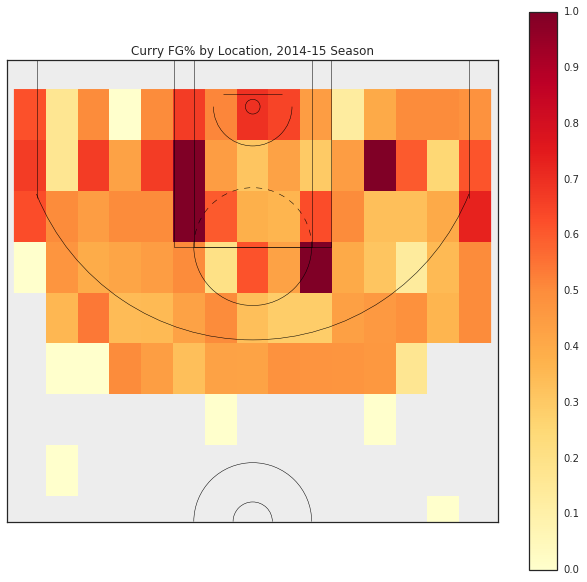

In [65]:
fgHeat = nba.heatmap(curry_shots.LOC_X, curry_shots.LOC_Y,
                          curry_shots.SHOT_MADE_FLAG,bins=15)

fig = plt.gcf()
fig.colorbar(fgHeat)
plt.title("Curry FG% by Location, 2014-15 Season")
plt.show()

#### Adding Steph's picture to the shot chart

In [66]:
curry_id = curry_shots['PLAYER_ID'].iloc[1]

In [67]:
img = nba.get_player_img(curry_id)

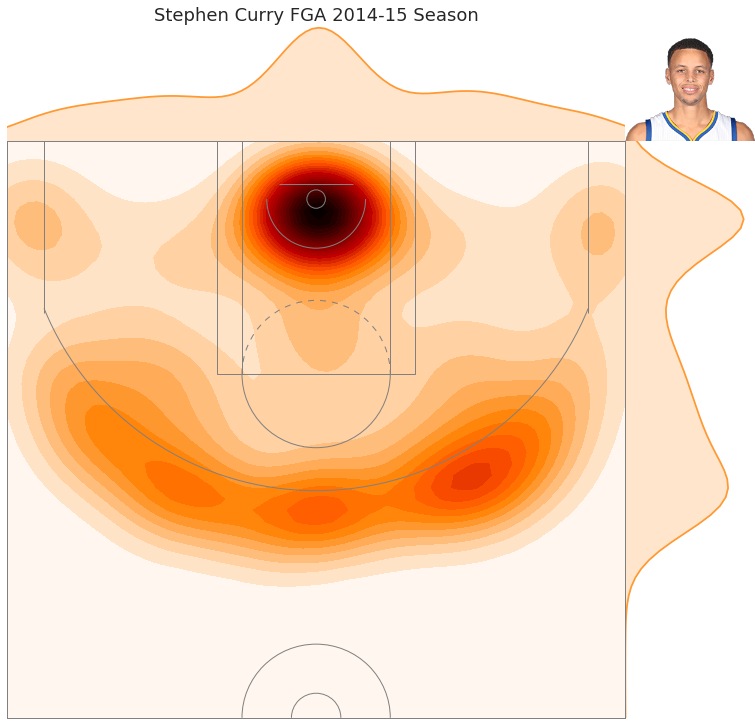

In [68]:
# create joint grid
stephShots = nba.shot_chart_jointplot(curry_shots.LOC_X, 
                                curry_shots.LOC_Y, kind="kde",
                                title="Stephen Curry FGA 2014-15 Season",
                                color=cmap(.2), cmap=cmap, n_levels=30)

# set offset of image
offset_img = OffsetImage(img, zoom=0.6)
offset_img.set_offset((621, 584))

stephShots.ax_joint.add_artist(offset_img)

plt.show()

### Creating Interactive Shot Charts

In [69]:
from bokeh.plotting import output_notebook, show
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

In [70]:
colormap = {0: 'orangered', 1: 'cornflowerblue'}
shot_outcome = {0: "MISSED", 1: "MADE"}

In [71]:
curry_shots['color'] = curry_shots.SHOT_MADE_FLAG.map(lambda x: colormap[x])
curry_shots['shot_outcome'] = curry_shots.SHOT_MADE_FLAG.map(lambda x: shot_outcome[x])

In [72]:
hover = HoverTool(
        tooltips=[
          ("Shot Index", "$index"), ("Shot Type", "@SHOT_TYPE"),
          ("Shot Outcome", "@shot_outcome"), ("Action Type", "@ACTION_TYPE"),
          ("Shot Distance", "@SHOT_DISTANCE ft"),("Quarter", " @PERIOD_x"),
          ("Steph Seconds Played", " @stephConsecutiveSeconds"),
        ]
    )

In [1]:
fig = nba.bokeh_shot_chart(curry_shots, fill_color="color",
                           hover_tool=True, tools=[hover],)
show(fig)

NameError: name 'nba' is not defined

## Exploring Steph Curry's Three Point Shooting 

* Does he shoot better from a certain spot?
* Does he shoot better in any particular quarter?
* How does seconds on the floor impact his shooting? 

In [74]:
curry_threes = curry_shots[curry_shots['SHOT_TYPE'] == '3PT Field Goal']

Steph Attempted 646 three pointers last season, check to make sure DF is correct size

In [75]:
len(curry_threes)

646

#### Create heat map for 3PT FGs

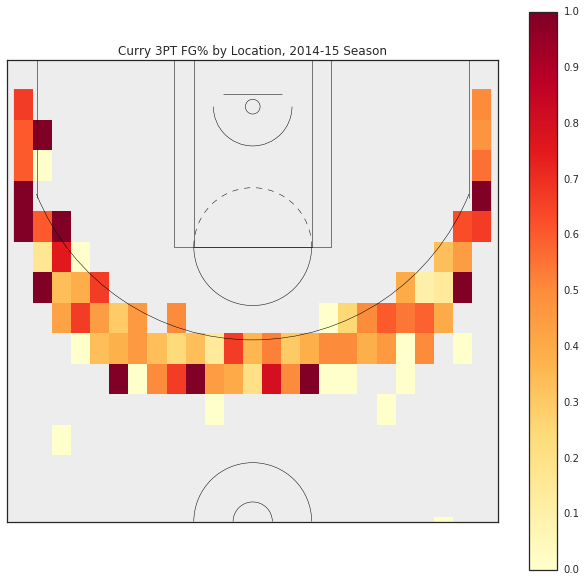

In [76]:
threeHeat = nba.heatmap(curry_threes.LOC_X, curry_threes.LOC_Y,
                          curry_threes.SHOT_MADE_FLAG,bins=25)

fig = plt.gcf()
fig.colorbar(threeHeat)
plt.title("Curry 3PT FG% by Location, 2014-15 Season")
plt.show()

#### Three Point Shooting by Quarter

In [78]:
curry_threes.groupby(['PERIOD_x'])['SHOT_MADE_FLAG'].value_counts()

PERIOD_x  SHOT_MADE_FLAG
1         0                 123
          1                  93
2         0                  60
          1                  60
3         0                 113
          1                  86
4         0                  63
          1                  45
5         1                   2
          0                   1
dtype: int64

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


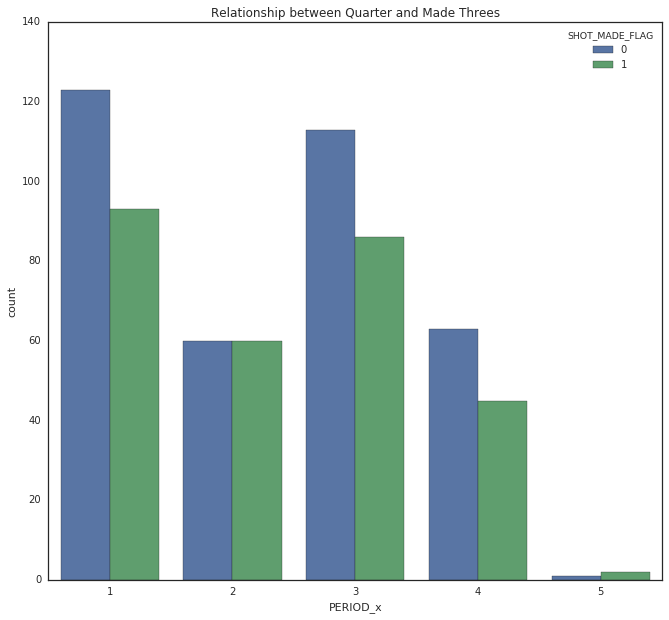

In [79]:
sns.countplot(x='PERIOD_x', hue='SHOT_MADE_FLAG', data=curry_threes);
plt.title('Relationship between Quarter and Made Threes');

#### Three Point Shooting by Seconds on Court

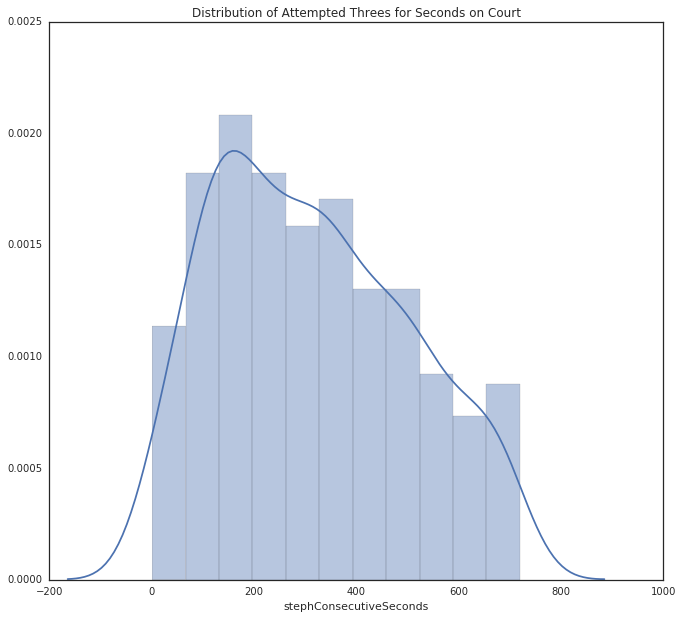

In [80]:
sns.distplot(curry_threes['stephConsecutiveSeconds'])
plt.title('Distribution of Attempted Threes for Seconds on Court');

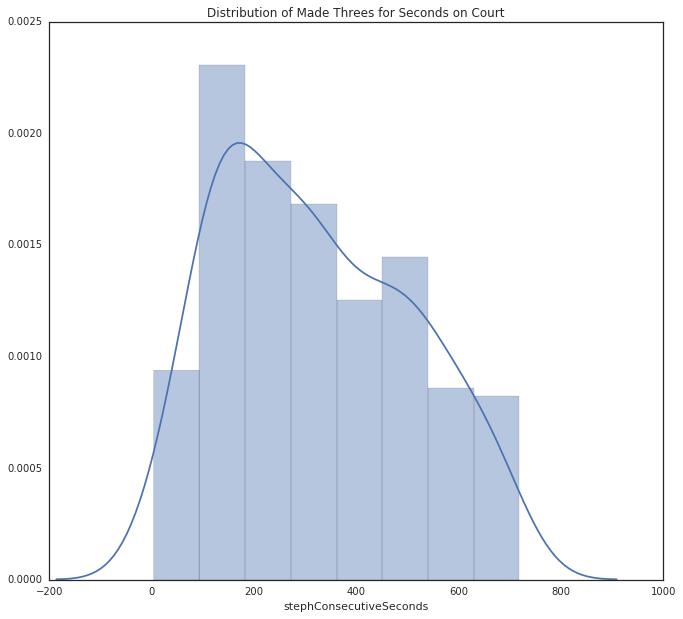

In [81]:
made_threes = curry_threes[curry_threes['SHOT_MADE_FLAG'] == 1]
sns.distplot(made_threes['stephConsecutiveSeconds'])
plt.title('Distribution of Made Threes for Seconds on Court');

#### Create new column "secondsRange" that categorizes how long Steph has been on the court

In [82]:
curry_threes.loc[curry_threes['stephConsecutiveSeconds'] > 480, 'secondsRange'] = 'greaterThan8min'

curry_threes.loc[curry_threes['stephConsecutiveSeconds'] < 120, 'secondsRange'] = 'lessThan2min'

curry_threes.loc[(curry_threes['stephConsecutiveSeconds'] > 120) & 
            (curry_threes['stephConsecutiveSeconds'] < 240 ), 'secondsRange'] = 'lessThan4min'

curry_threes.loc[(curry_threes['stephConsecutiveSeconds'] > 240) & 
            (curry_threes['stephConsecutiveSeconds'] < 360 ), 'secondsRange'] = 'lessThan6min'

curry_threes.loc[(curry_threes['stephConsecutiveSeconds'] > 360) & 
            (curry_threes['stephConsecutiveSeconds'] < 480 ), 'secondsRange'] = 'lessThan8min'

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [83]:
curry_threes.groupby(['secondsRange'])['SHOT_MADE_FLAG'].value_counts()

secondsRange     SHOT_MADE_FLAG
greaterThan8min  0                 75
                 1                 68
lessThan2min     0                 65
                 1                 41
lessThan4min     0                 82
                 1                 72
lessThan6min     0                 74
                 1                 58
lessThan8min     0                 62
                 1                 44
dtype: int64

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


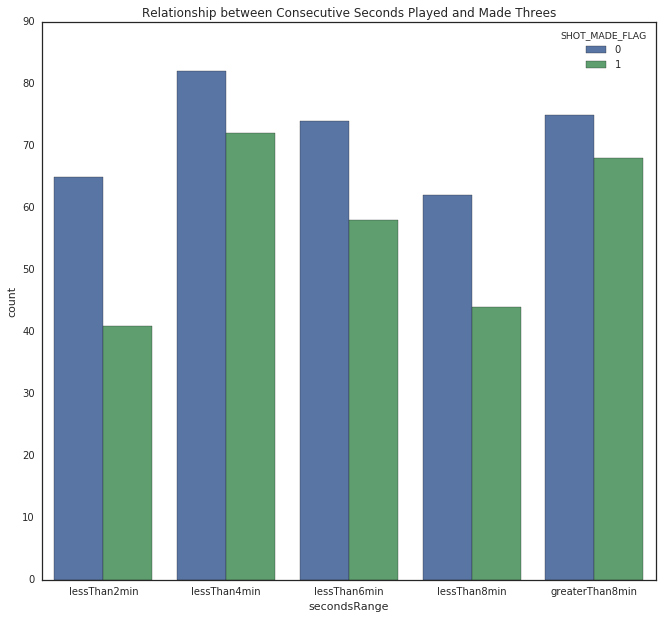

In [84]:
sns.countplot(x='secondsRange', hue='SHOT_MADE_FLAG', data=curry_threes,
              order = ('lessThan2min','lessThan4min','lessThan6min','lessThan8min','greaterThan8min'));
plt.title('Relationship between Consecutive Seconds Played and Made Threes');

In [85]:
curry_threes.to_csv('/data/bkotecha/threes_with_secondRanges.csv')